# Vegetable Data Building

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size=(128,128), class_mode='categorical',batch_size=24)

Found 1324 images belonging to 9 classes.


In [6]:
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set',target_size=(128,128),class_mode='categorical',batch_size=24)

Found 3426 images belonging to 9 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [8]:
model=Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [14]:
model.add(Dense(9,activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
len(x_train)

56

In [17]:
1238/24

51.583333333333336

In [18]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
56/56 [==============================] - 2108s 38s/step - loss: 1.8045 - accuracy: 0.7289 - val_loss: 17.0217 - val_accuracy: 0.1179
Epoch 2/10
56/56 [==============================] - 69s 1s/step - loss: 0.2563 - accuracy: 0.8897 - val_loss: 18.0219 - val_accuracy: 0.1620
Epoch 3/10
56/56 [==============================] - 70s 1s/step - loss: 0.2123 - accuracy: 0.9071 - val_loss: 15.6692 - val_accuracy: 0.1512
Epoch 4/10
56/56 [==============================] - 68s 1s/step - loss: 0.1821 - accuracy: 0.9328 - val_loss: 19.5919 - val_accuracy: 0.1605
Epoch 5/10
56/56 [==============================] - 69s 1s/step - loss: 0.1442 - accuracy: 0.9396 - val_loss: 20.8544 - val_accuracy: 0.1462
Epoch 6/10
56/56 [==============================] - 68s 1s/step - loss: 0.1382 - accuracy: 0.9449 - val_loss: 18.8630 - val_accuracy: 0.1900
Epoch 7/10
56/56 [==============================] - 70s 1s/step - loss: 0.0953 - accuracy: 0.9698 - val_loss: 20.9675 - val_accuracy: 0.1900
Epoch 8/10

In [19]:
model.save('vegetabledata.h5')

In [20]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('vegetabledata.h5')

In [23]:
img=image.load_img(r"/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b6220993-c51f-48fa-bee9-fb5cb89cc0c4___RS_Early.B 7467.JPG")

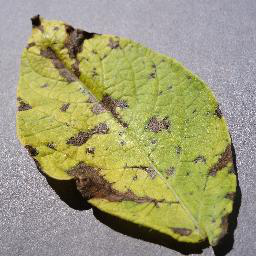

In [24]:
img

In [25]:
x=image.img_to_array(img)

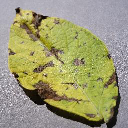

In [26]:
img=image.load_img(r"/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b6220993-c51f-48fa-bee9-fb5cb89cc0c4___RS_Early.B 7467.JPG",target_size=(128,128))
img

In [27]:
x=image.img_to_array(img)

In [28]:
x

array([[[177., 175., 188.],
        [175., 173., 186.],
        [174., 172., 185.],
        ...,
        [151., 150., 166.],
        [157., 156., 172.],
        [150., 149., 165.]],

       [[177., 175., 188.],
        [173., 171., 184.],
        [174., 172., 185.],
        ...,
        [151., 150., 166.],
        [156., 155., 171.],
        [155., 154., 170.]],

       [[174., 172., 185.],
        [173., 171., 184.],
        [175., 173., 186.],
        ...,
        [151., 150., 166.],
        [153., 152., 168.],
        [157., 156., 172.]],

       ...,

       [[167., 164., 171.],
        [133., 130., 137.],
        [149., 146., 153.],
        ...,
        [142., 140., 153.],
        [125., 123., 136.],
        [139., 137., 150.]],

       [[123., 120., 127.],
        [148., 145., 152.],
        [137., 134., 141.],
        ...,
        [151., 149., 162.],
        [134., 132., 145.],
        [132., 130., 143.]],

       [[139., 136., 143.],
        [144., 141., 148.],
        [153., 1

In [29]:
x=np.expand_dims(x,axis=0)

In [30]:
x

array([[[[177., 175., 188.],
         [175., 173., 186.],
         [174., 172., 185.],
         ...,
         [151., 150., 166.],
         [157., 156., 172.],
         [150., 149., 165.]],

        [[177., 175., 188.],
         [173., 171., 184.],
         [174., 172., 185.],
         ...,
         [151., 150., 166.],
         [156., 155., 171.],
         [155., 154., 170.]],

        [[174., 172., 185.],
         [173., 171., 184.],
         [175., 173., 186.],
         ...,
         [151., 150., 166.],
         [153., 152., 168.],
         [157., 156., 172.]],

        ...,

        [[167., 164., 171.],
         [133., 130., 137.],
         [149., 146., 153.],
         ...,
         [142., 140., 153.],
         [125., 123., 136.],
         [139., 137., 150.]],

        [[123., 120., 127.],
         [148., 145., 152.],
         [137., 134., 141.],
         ...,
         [151., 149., 162.],
         [134., 132., 145.],
         [132., 130., 143.]],

        [[139., 136., 143.],
       

In [31]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 158ms/step


In [32]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [33]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [34]:
index[y[0]]

'Pepper,_bell___Bacterial_spot'

In [35]:
img=image.load_img(r"/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b6220993-c51f-48fa-bee9-fb5cb89cc0c4___RS_Early.B 7467.JPG",target_size=(128,128))

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 42ms/step


'Pepper,_bell___Bacterial_spot'